# COMP3314 HW3: Image Classification

In this project, you could use all the techniques that you learn from this course **(except CNNs)**  to construct an image classifier for the given dataset. You are required to complete the tasks in the following three sections to prepare the dataset, build your classifier, and submit your predictions on the test set.

Important notes:
- TAs will run the code to check the final results. Please make the code executable and keep your executed outputs. If TAs find the executed result does not match the final submission, this submission will receive 0 points.
- Do not use convolutional neural networks (CNNs) in this project.
- Make sure to submit the file in the specified format. Otherwiser, our autograder will not be able to verify your results.
- Do not use any additional datasets or pretrained networks in this project. Do not copy the code or prediction results from others.

In [9]:
!pip install pyprind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Section 0. Download dataset.

In [10]:
import cv2
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path
import urllib.request
import zipfile
import urllib
import hashlib
from tqdm import tqdm
import pyprind
import matplotlib.pyplot as plt
import seaborn as sns


random.seed(0)
np.random.seed(0)

In [5]:
def download_data(data_dir):
    """
    DO NOT modify the code in this cell.
    
    Args:
        data_dir (Path): Path to the download and extract data directory.

    Returns:
        xs_train: (num_train, 32, 32, 3) uint8
        ys_train: (num_train, ) uint8
        xs_test: (num_test, 32, 32, 3) uint8
    """

    class DownloadProgressBar(tqdm):

        def update_to(self, b=1, bsize=1, tsize=None):
            if tsize is not None:
                self.total = tsize
            self.update(b * bsize - self.n)

    def compute_md5(file_path):
        file_path = Path(file_path)
        if not file_path.is_file():
            raise ValueError(f"File {file_path} does not exist.")

        with open(file_path, "rb") as f:
            file_hash = hashlib.md5()
            chunk = f.read(8192)
            while chunk:
                file_hash.update(chunk)
                chunk = f.read(8192)

        return str(file_hash.hexdigest())

    def maybe_download_url(url, output_path, md5sum=None):
        output_path = Path(output_path)

        if output_path.is_file() and md5sum is not None:
            if compute_md5(output_path) == md5sum:
                print(f"{output_path} exists and MD5 matches. Skip download.")
                return

        with DownloadProgressBar(unit='B',
                                 unit_scale=True,
                                 miniters=1,
                                 desc=url.split('/')[-1]) as t:
            urllib.request.urlretrieve(url,
                                       filename=output_path,
                                       reporthook=t.update_to)

    # Paths
    data_dir = Path(data_dir)
    data_dir.mkdir(parents=True, exist_ok=True)
    zip_path = data_dir / "data.zip"
    url = "https://github.com/comp3314/hw3-data/releases/download/hw3/data.zip"
    md5sum = "bd4f13ea7b8d9b79c1320fe559698dbd"

    # Download URL
    maybe_download_url(url, zip_path, md5sum=md5sum)

    # Extract zip
    print("Extracting...")
    with zipfile.ZipFile(zip_path, 'r') as f:
        f.extractall(data_dir)
    print("Extracting done.")


def load_data(data_dir):
    data_dir = Path(data_dir)
    if not data_dir.is_dir():
        raise ValueError(f"{data_dir} is not a directory.")

    # Read train
    train_dir = data_dir / "train"
    train_label_path = train_dir / "labels.txt"
    xs_train = []
    ys_train = []
    with open(train_label_path, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
    for line in tqdm(lines, desc="Read train"):
        im_path, im_label = line.split(" ")
        im_path = train_dir / im_path
        im_bgr = cv2.imread(str(im_path))
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
        assert im_rgb.shape == (32, 32, 3)
        assert im_rgb.dtype == np.uint8
        xs_train.append(im_rgb)
        ys_train.append(int(im_label))

    # Read test
    test_dir = data_dir / "test"
    test_label_path = test_dir / "labels.txt"
    xs_test = []
    with open(test_label_path, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
    for line in tqdm(lines, desc="Read test"):
        im_path = line
        im_path = test_dir / im_path
        im_bgr = cv2.imread(str(im_path))
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
        assert im_rgb.shape == (32, 32, 3)
        assert im_rgb.dtype == np.uint8
        xs_test.append(im_rgb)

    xs_train = np.array(xs_train, dtype=np.uint8)
    ys_train = np.array(ys_train)
    xs_test = np.array(xs_test, dtype=np.uint8)

    return xs_train, ys_train, xs_test

data_dir="data"
download_data(data_dir=data_dir)
xs_train, ys_train, xs_test = load_data(data_dir=data_dir)

xs_train = np.array(xs_train)
ys_train = np.array(ys_train)
xs_test = np.array(xs_test)

print('xs_train: ', xs_train.shape)
print('ys_train: ', ys_train.shape)
print('xs_test: ', xs_test.shape)

data/data.zip exists and MD5 matches. Skip download.
Extracting...
Extracting done.


Read test: 100%|██████████| 10000/10000 [00:00<00:00, 13000.66it/s]


xs_train:  (50000, 32, 32, 3)
ys_train:  (50000,)
xs_test:  (10000, 32, 32, 3)


## Section 1. Dataset preparation. (10 Points)

Before dealing with a new dataset, it is important to know the basic information of the data. 

### Section 1.1. How many categories does this dataset cover? (2 points)

In [ ]:
# === Your code here ===
print(np.unique(ys_train))
print("This database totally covoered %d categories." % len(np.unique(ys_train)))
# ======================

[0 1 2 3 4 5 6 7 8 9]
This database totally covoered 10 categories.


### Section 1.2. How many train/test samples does each category contain? (3 points)

In [ ]:
# === Your code here ===
for i in np.unique(ys_train):
    print("There are %d samples in train data for category %d." %(np.sum(ys_train == i),i))

print("For test sample, the category distribution should be unknown.")
# ======================

There are 5000 samples in train data for category 0.
There are 5000 samples in train data for category 1.
There are 5000 samples in train data for category 2.
There are 5000 samples in train data for category 3.
There are 5000 samples in train data for category 4.
There are 5000 samples in train data for category 5.
There are 5000 samples in train data for category 6.
There are 5000 samples in train data for category 7.
There are 5000 samples in train data for category 8.
There are 5000 samples in train data for category 9.
For test sample, the category distribution should be unknown.


### Section 1.3. Visualize one sample for each category. (5 points)

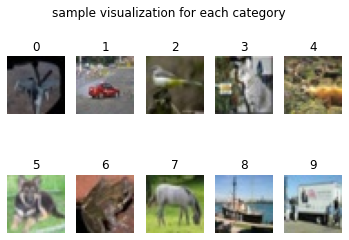

In [ ]:
# === Your code here ===

# param: 
#   (int) ver : the version of sample
def plotImage(xs,ys, ver = 0):
    fig, axs = plt.subplots(2,5)

    row, col = 0,0
    for category_target in np.unique(ys):
        ver_count = 0
        for i, category in enumerate(ys):
                if category_target == category:
                    if(ver == ver_count):
                        axs[row, col].imshow(xs[i,:,:,:])
                        axs[row, col].axis('off')
                        axs[row,col].set_title(str(category_target))
                        if(col == 4):
                            col = 0
                            row += 1
                        elif(col != 4):
                            col += 1
                        break
                    elif(ver != ver_count):
                        ver_count += 1
    plt.suptitle("sample visualization for each category")
    plt.show()
plotImage(xs_train,ys_train, ver = 10)            
# ======================

## Section 2.  Controlled experiments. (30 Points)

You are required to perform 3 controlled experiments. There are many aspects that you could explore in the controlled experiments, for example:

- Comparisons for different classifiers. 
- Tuning a hyper-parameter for a specific classifier.
- Different pre-processing methods, like normalization, extracting the edge features, grayscale, etc.   
- Ensembling, boosting, or voting methods.
- ...

You are required to explore at least 3 aspects. For each experiment, you should add a subsection in a text cell, and briefly explain your experimental results. To verify your results, you should split the validation set by yourself to carry out experiments to find out the best settings.

### Section 2.1. Controlled experiment I. (10 points)

In [20]:
# === Your code here ===
# Objective : compare different classification models
# Result : Among Logistic Regression, RandomForestClassifier, DecisionTreeClassifier, RandomForestClassifier performed the best accuracy as
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

xs_train_re = np.reshape(xs_train,(xs_train.shape[0], 32*32*3))
xs_test_re = np.reshape(xs_test,(xs_test.shape[0], 32*32*3))

xs_train_norm = xs_train_re / np.max(xs_train)
xs_test_norm = xs_test_re / np.max(xs_test)

xi_train, xi_valid, yi_train, yi_valid = train_test_split(xs_train_norm,ys_train, test_size = 0.2, stratify = ys_train, random_state = 3314)

scores = dict()
clf1 = LogisticRegression(penalty = 'l2',multi_class = 'multinomial', solver = 'saga')
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier()

clfs = [clf1,clf2,clf3]
names = ["Logistic", "RandomForest","DecisionTree"]

for name, clf in zip(names,clfs):
    clf.fit(xi_train,yi_train)
    if(name in scores.keys()):
        scores[name].append(clf.score(xi_valid,yi_valid))
    else:
        scores[name] = [clf.score(xi_valid,yi_valid)]

print(scores)
# ======================

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'Logistic': [0.4043], 'RandomForest': [0.4576], 'DecisionTree': [0.2609]}


### Section 2.2. Controlled experiment II. (10 points)

In [ ]:
# === Your code here ===
# Tuning hyper-parameter for a specific classifier.
# result for Logistic Regression classification model, the best parameter C is 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

xs_train_re = np.reshape(xs_train,(xs_train.shape[0], 32*32*3))
xs_test_re = np.reshape(xs_test,(xs_test.shape[0], 32*32*3))

xs_train_norm = xs_train_re / np.max(xs_train)

xi_train, xi_valid, yi_train, yi_valid = train_test_split(xs_train_norm,ys_train, test_size = 0.2, stratify = ys_train, random_state = 3314)

clf = LogisticRegression(penalty = 'l2',multi_class = 'multinomial', solver = 'saga')
param = {'classifier__C': [1e-4,1,1e4],
         'classifier': [clf]}
pipeline = Pipeline([('classifier', clf)])
gs = GridSearchCV(pipeline, param, cv = 2, n_jobs = -1, scoring = 'accuracy', verbose = 1).fit(xi_train, yi_train)
print(gs.best_params_)
# ======================

Fitting 2 folds for each of 3 candidates, totalling 6 fits
{'classifier': LogisticRegression(C=1, multi_class='multinomial', solver='saga'), 'classifier__C': 1}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'classifier': LogisticRegression(C=1, multi_class='multinomial', solver='saga'), 'classifier__C': 1}
0.38617500000000005


### Section 2.3. Controlled experiment III. (10 points)

In [ ]:
# === Your code here ===
# Objective of #1 experiment : compare accuracy result between normalization and standardization preprocessing method
# Result : normalization data performed greater accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xs_train_re = np.reshape(xs_train,(xs_train.shape[0], 32*32*3))
xs_test_re = np.reshape(xs_test,(xs_test.shape[0], 32*32*3))

xs_train_norm = xs_train_re / np.max(xs_train)
xs_test_norm = xs_test_re / np.max(xs_test)

scaler = StandardScaler()
xs_train_std = scaler.fit_transform(xs_train_re)
xs_test_std = scaler.transform(xs_test_re)

names = ["norm", "std"]
X_train = [xs_train_norm, xs_train_std]
X_test = [xs_test_norm, xs_test_std]

scores = dict()
for name, x_train,x_test in zip(names, X_train, X_test):

    xi_train, xi_valid, yi_train, yi_valid = train_test_split(x_train,ys_train, test_size = 0.2, stratify = ys_train, random_state = 3314)
    clf = LogisticRegression(penalty = 'l2', C = 1e4, multi_class = 'multinomial', solver = 'saga')
    clf.fit(xi_train,yi_train)
    if(name in scores.keys()):
        scores[name].append(clf.score(xi_valid,yi_valid))
    else:
        scores[name] = [clf.score(xi_valid,yi_valid)]

print(scores)
# ======================

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'norm': [0.4038], 'std': [0.3918]}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Section 3. Your final model. (10 Points)

This is the most important part of this project. You can use all your findings in the experiments above and with other techniques to build your final image classification model. This model will be used to predic the official test set for submission.

In [7]:
# === Your code here ===
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


clf1 = LogisticRegression(penalty = 'l2', random_state = 3314, solver = 'saga', max_iter = 100, multi_class = 'multinomial')
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(random_state = 3314)
clf4 = MLPClassifier(random_state = 3314)

param1 = {'classifier__C': [1 * (10 ** i) for i in range(-4,4,2)],
          'classifier': [clf1]}

param2 = {'classifier__n_neighbors': [10,30,50],
          'classifier': [clf2]}

param2_best = {'classifier__n_neighbors': [10,30,50],
          'classifier': [clf2]}

param3 = {'classifier__n_estimators': [100,150,200],
          'classifier__max_depth': [10,25,50],
          'classifier': [clf3]}

param3_best = {'classifier__n_estimators': [200],
          'classifier__max_depth': [25],
          'classifier': [clf3]}

param4 = {'classifier__hidden_layer_sizes': [(100,),(50,100,),(50,100,150)],
         'classifier__activation': ['relu'],
         'classifier__solver': ['sgd','adam'],
         'classifier__alpha': [0.5],
         'classifier__learning_rate' :['constant'],
         'classifier__max_iter': [1000],
         'classifier' : [clf4]}


params = [param1, param2, param3, param4]
names = ["LogisticRegression", "K-Neighbors","RandomForest", "MultilayerPerceptron"]
clfs = [clf1, clf2, clf3, clf4]

best_params = dict()
best_scores = dict()
y_valid_preds = dict()

xs_train_re = np.reshape(xs_train,(xs_train.shape[0], 32*32*3))
xs_test_re = np.reshape(xs_test,(xs_test.shape[0], 32*32*3))

xs_train_norm = xs_train_re / np.max(xs_train)
xs_test_norm = xs_test_re / np.max(xs_test)

xi_train, xi_valid, yi_train, yi_valid = train_test_split(xs_train_norm,ys_train, test_size = 0.2, stratify = ys_train, random_state = 3314)

clf1_best = LogisticRegression(C = 0.01, penalty = 'l2', random_state = 3314, solver = 'saga', max_iter = 100, multi_class = 'multinomial')
clf2_best = KNeighborsClassifier(n_neighbors = 10)
clf3_best = RandomForestClassifier(random_state = 3314, max_depth = 25, n_estimators = 200)
clf5_best = MLPClassifier(alpha=0.5, hidden_layer_sizes=(100,), max_iter=1000,
                random_state=3314, solver='sgd')

# ======================

In [8]:
for name, clf, param in zip(names,clfs, params):
    pipeline = Pipeline([('classifier', clf)])
    gs = GridSearchCV(pipeline, param, cv = 2, n_jobs = -1, scoring = 'accuracy', verbose = 1).fit(xi_train, yi_train)
    best_params[name] = gs.best_params_
    best_scores[name] = gs.score(xi_valid, yi_valid)
    y_valid_preds[name] = gs.predict(xi_valid)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [11]:
best_params

{'LogisticRegression': {'classifier': LogisticRegression(C=0.01, multi_class='multinomial', random_state=3314,
                     solver='saga'), 'classifier__C': 0.01},
 'K-Neighbors': {'classifier': KNeighborsClassifier(n_neighbors=10),
  'classifier__n_neighbors': 10},
 'RandomForest': {'classifier': RandomForestClassifier(max_depth=25, n_estimators=200, random_state=3314),
  'classifier__max_depth': 25,
  'classifier__n_estimators': 200},
 'MultilayerPerceptron': {'classifier': MLPClassifier(alpha=0.5, max_iter=1000, random_state=3314, solver='sgd'),
  'classifier__activation': 'relu',
  'classifier__alpha': 0.5,
  'classifier__hidden_layer_sizes': (100,),
  'classifier__learning_rate': 'constant',
  'classifier__max_iter': 1000,
  'classifier__solver': 'sgd'}}

In [16]:
gs.best_params_

{'classifier': MLPClassifier(alpha=0.5, max_iter=1000, random_state=3314, solver='sgd'),
 'classifier__activation': 'relu',
 'classifier__alpha': 0.5,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__learning_rate': 'constant',
 'classifier__max_iter': 1000,
 'classifier__solver': 'sgd'}

In [14]:
ys_test_pred = gs.predict(xs_test_norm)

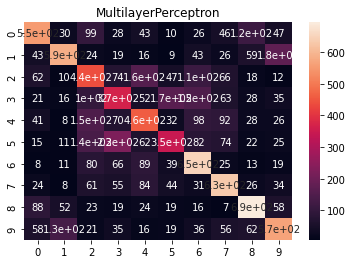

In [13]:
#visualize the confusion matrix

from sklearn.metrics import confusion_matrix

# fig, axes = plt.subplots(1,5)

for name in names:
    if(name == "MultilayerPerceptron"):
        cm = confusion_matrix(yi_valid, y_valid_preds[name])
        sns.heatmap(data = cm, annot = True).set_title(name)


## Section 4. Report your result. (50 Points)

### 4.1. Briefly summarize your experiments. (5 Points)

Write your answers here. You do not need to write a long report, just summarize your designed experiments and the conclusions.



### 4.2. Explain your final solution. (5 Points) 


1. reshape the xs_test to (10000, 32* 32* 3)
2. normalize the values in xs_test by dividing the original values by 255 as 0-1
3. apply different multi-class classifiction models with different hyperparameter
4. conclude that sklearn.neural_network.MLPClassifier performed the best accuracy as 0.52


### 4.3 Submit your predictions on the test set. (40 Points).

We will rank the prediction accuracy for all the submissions. The grading rules will be:

- 40 points for the Top 10%.
- 30 points for the Top 20%.
- 20 points for the Top 50%.
- 10 points for the Top 100%.

Notes:
- Save your predictions on the test set using our code. Do not modify the `save_submission_results()` funciton below. Before submitting your txt file, please check your format is the same as our given file: `pred_0123456789.txt`.
- Zip (1) Your prediction file: `pred_xxxxxx.txt` and (2) `hw3.ipynb` file in a zip file and submit to Moodle.

In [18]:
def save_submission_results(ys_test_pred, uid="WRITE_YOUR_UID_HERE"):
    """
    DO NOT modify this function. Otherwise, our autograder will not
    be able to verify your results.
    
    Args:
        ys_test_pred: numpy array of shape (num_tests, )
        uid: student's UID. 
    """
    num_tests = 10000
    assert isinstance(ys_test_pred, np.ndarray)
    assert ys_test_pred.shape == (num_tests, )
    
    out_path = f"pred_{uid}.txt"
    with open(out_path, "w") as f:
        for idx, y_pred in enumerate(ys_test_pred):
            im_name = f"test_{idx:05d}.jpg"
            f.write(f"{im_name} {y_pred}\n")
    
    print(f"Result written to {out_path}")

In [19]:
# === Your code here ===
save_submission_results(ys_test_pred, uid="3035790941")
# ======================

Result written to pred_3035790941.txt
